# **1. Perkenalan Dataset**


Dataset yang digunakan adalah dataset online retail yang diperoleh dari `https://archive.ics.uci.edu/dataset/352/online+retail`. Dataset ini terdiri dari 541909 baris dan 8 fitur dengan deskripsi sebagai berikut:

- InvoiceNo: Invoice number. Nominal, Nominal, angka integral 6 digit yang secara unik diberikan untuk setiap transaksi. Jika kode ini diawali dengan huruf 'C', itu menunjukkan pembatalan. 
- StockCode: Kode produk (item). Nominal, angka integral 5 digit yang secara unik diberikan untuk setiap produk yang berbeda.
- Description: Nama produk (item). Nominal.
- Quantity: Jumlah produk (item) per transaksi. Numerik.
- InvoiceDate: Tanggal dan waktu faktur. Numerik, menunjukkan hari dan waktu ketika setiap transaksi dibuat.
- UnitPrice: Harga per unit. Numerik, menunjukkan harga produk per unit dalam mata uang sterling.
- CustomerID: Nomor pelanggan. Nominal, angka integral 5 digit yang secara unik diberikan untuk setiap pelanggan.
- Country: Nama negara. Nominal, menunjukkan nama negara tempat pelanggan berada.

## Tujuan Bisnis

Tujuan dari project ini adalah untuk mengelompokan pelanggan berdasarkan transaksi yang dibuat

# **2. Import Library**

In [70]:
pip install yellowbrick

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [72]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [73]:
df = pd.read_excel("Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **4. Exploratory Data Analysis (EDA)**

## a. Analisis Struktur dan Statistika Deskriptif

In [74]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## b. Identifikasi Missing Value

In [76]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [77]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


## c. Identifikasi Duplikasi data

In [78]:
print(df.duplicated().sum())

5268


## d. Analisis Distribusi dan Korelasi

In [79]:
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

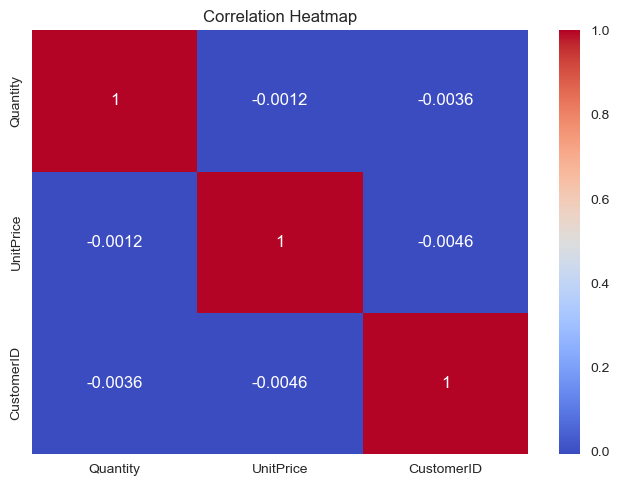

In [80]:
sns.heatmap(df[numerical_columns.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

c:\Users\khafidz\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\khafidz\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


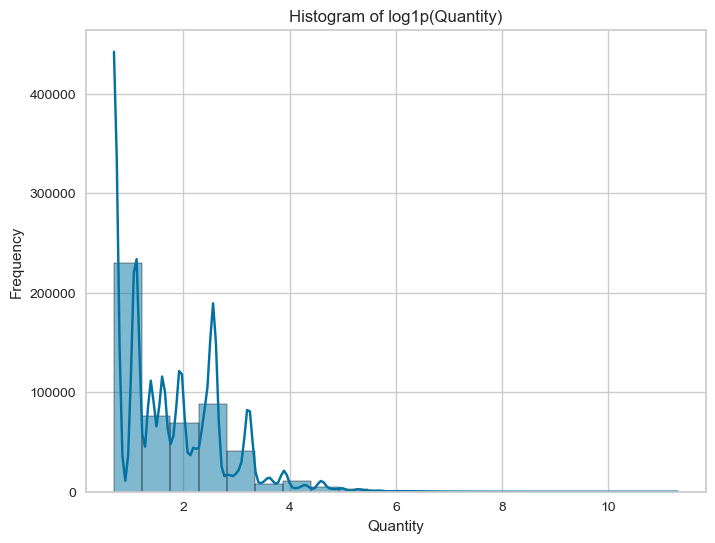

c:\Users\khafidz\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


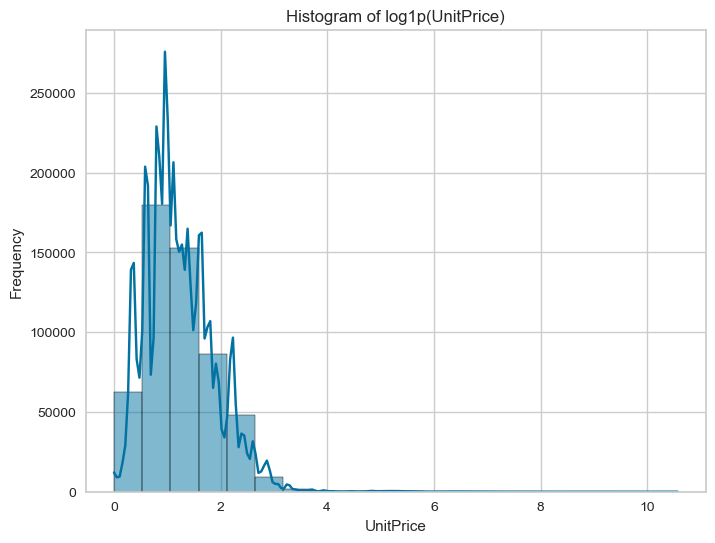

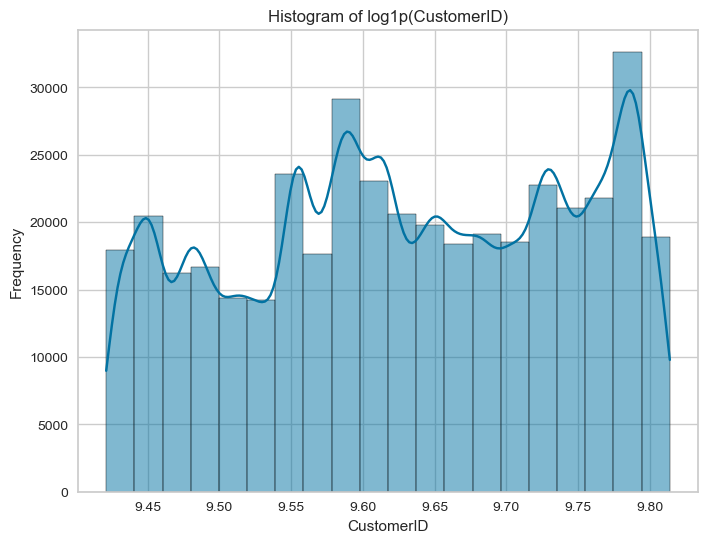

In [81]:
for col in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(np.log1p(df[col]), kde=True, bins=20)
    plt.title(f'Histogram of log1p({col})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## e. Visualisasi Data

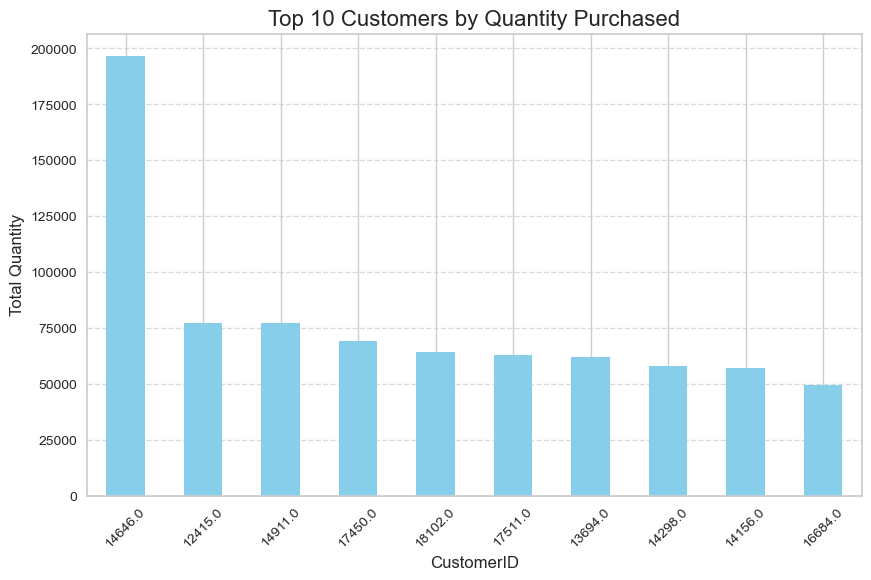

In [82]:
top_customers = (
    df.groupby('CustomerID')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot barchart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Quantity Purchased', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

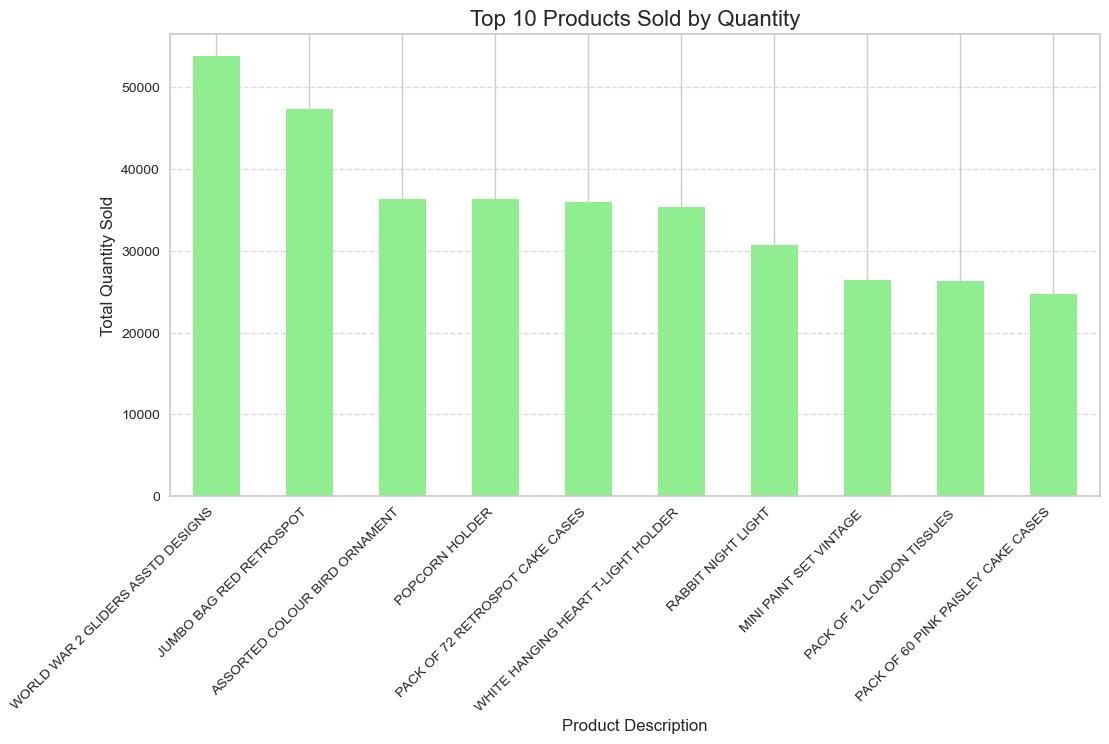

In [83]:
top_products = (
    df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products Sold by Quantity', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **5. Data Preprocessing**

## a. Penanganan Missing Value

In [84]:
df.dropna(inplace=True)

In [85]:
print(f"Missing Value after Handling:\n{df.isnull().sum()}\n\n")
print(f"Data Shape After Handling: {df.shape}")

Missing Value after Handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Data Shape After Handling: (406829, 8)


In [86]:
df.drop_duplicates(inplace=True)
print(f"Data duplicate after Handling:\n{df.duplicated().sum()}\n\n")
print(f"Data Shape After Handling: {df.shape}")

Data duplicate after Handling:
0


Data Shape After Handling: (401604, 8)


## b. Pemeriksaan validitas data

Pada tahap ini akan dilakukan pemeriksaan validitas data. Data pembelian yang dicancel oleh pelanggan akan dihapus dari dataframe



In [87]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [88]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [89]:
cancel_data = df[df['Quantity'] < 0]
cancel_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [90]:
df.drop(df[df['Quantity'] < 0].index, inplace=True)
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [91]:
cancel_data['InvoiceNo'] = cancel_data['InvoiceNo'].str.lstrip('C')
cancel_data['Quantity'] = cancel_data['Quantity'] * -1
cancel_data

C:\Users\khafidz\AppData\Local\Temp\ipykernel_1140\1444047657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_data['InvoiceNo'] = cancel_data['InvoiceNo'].str.lstrip('C')
C:\Users\khafidz\AppData\Local\Temp\ipykernel_1140\1444047657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_data['Quantity'] = cancel_data['Quantity'] * -1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,581499,M,Manual,1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [92]:
matching_data = df.merge(
    cancel_data,
    on=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID'],
    how='inner'
)

print(f"Jumlah data yang cocok: {len(matching_data)}")
print(matching_data.head())


Jumlah data yang cocok: 0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description_x, Quantity, InvoiceDate_x, UnitPrice, CustomerID, Country_x, Description_y, InvoiceDate_y, Country_y]
Index: []


In [93]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392732.0,392732,392732,392732.000000,392732,392732.000000,392732.000000,392732
unique,18536.0,3665,3877,NaN,NaN,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542.0,2023,2016,NaN,NaN,NaN,NaN,349227
mean,NaN,NaN,NaN,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,NaN
50%,NaN,NaN,NaN,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN


## c. Feature Engineering

Pada tahap ini, kita akan mengelompokan data berdasarkan CustomerID untuk melakukan segmentasi pelanggan. Selain itu, data country juga akan dikelompokan menjadi 2, yaitu UK dan non-UK. Hal ini karena jumlah data UK sangat dominan dibandingkan negara lain.

In [94]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [110]:
customer_data = df.groupby('CustomerID').agg({
    'Quantity' : 'sum',
    'TotalPrice' : 'sum',
    'Country' : 'unique'
}).reset_index()
customer_data

,CustomerID,Quantity,TotalPrice,Country
0,12346.0,74215,77183.60,[United Kingdom]
1,12347.0,2458,4310.00,[Iceland]
2,12348.0,2341,1797.24,[Finland]
3,12349.0,631,1757.55,[Italy]
4,12350.0,197,334.40,[Norway]
...,...,...,...,...
4334,18280.0,45,180.60,[United Kingdom]
4335,18281.0,54,80.82,[United Kingdom]
4336,18282.0,103,178.05,[United Kingdom]
4337,18283.0,1357,2045.53,[United Kingdom]


In [111]:
customer_data['Country'].value_counts()

Country
[United Kingdom]            3921
[Germany]                     94
[France]                      87
[Spain]                       28
[Belgium]                     22
[Portugal]                    19
[Switzerland]                 19
[Italy]                       14
[Finland]                     12
[Norway]                      10
[Channel Islands]              9
[Austria]                      9
[Netherlands]                  9
[Japan]                        8
[Sweden]                       8
[Australia]                    7
[Denmark]                      7
[Poland]                       6
[Cyprus]                       5
[Greece]                       4
[Unspecified]                  4
[Canada]                       4
[USA]                          4
[EIRE]                         3
[Israel]                       3
[United Arab Emirates]         2
[Malta]                        2
[Bahrain]                      2
[Switzerland, Cyprus]          1
[Cyprus, Spain]                1
[L

In [112]:
customer_data['Country'] = customer_data['Country'].apply(lambda x: x[0] if len(x) == 1 else ', '.join(x))
customer_data.head()

,CustomerID,Quantity,TotalPrice,Country
0,12346.0,74215,77183.60,United Kingdom
1,12347.0,2458,4310.00,Iceland
2,12348.0,2341,1797.24,Finland
3,12349.0,631,1757.55,Italy
4,12350.0,197,334.40,Norway


In [113]:
customer_data['Country'] = customer_data['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non-UK')
print(customer_data['Country'].value_counts())


Country
UK        3921
Non-UK     418
Name: count, dtype: int64


In [114]:
customer_data.describe(include='all')

,CustomerID,Quantity,TotalPrice,Country
count,4339.000000,4339.000000,4339.000000,4339
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,UK
freq,NaN,NaN,NaN,3921
mean,15299.936852,1190.570638,2048.215924,NaN
std,1721.889758,5053.148160,8984.248352,NaN
min,12346.000000,1.000000,0.000000,NaN
25%,13812.500000,159.000000,306.455000,NaN
50%,15299.000000,378.000000,668.560000,NaN
75%,16778.500000,990.500000,1660.315000,NaN


## d. Standarisasi Fitur

In [115]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
customer_data['Quantity'] = scaller.fit_transform(customer_data[['Quantity']])
customer_data['TotalPrice'] = scaller.fit_transform(customer_data[['TotalPrice']])

In [116]:
customer_data.rename(columns={'Quantity' : 'Quantity_scaled', 'TotalPrice': 'TotalPrice_scaled'}, inplace=True)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [117]:
X = customer_data.drop(columns=['CustomerID'])
X

,Quantity_scaled,TotalPrice_scaled,Country
0,14.452940,8.363977,UK
1,0.250849,0.251779,Non-UK
2,0.227692,-0.027938,Non-UK
3,-0.110750,-0.032357,Non-UK
4,-0.196647,-0.190780,Non-UK
...,...,...,...
4334,-0.226730,-0.207901,UK
4335,-0.224949,-0.219008,UK
4336,-0.215251,-0.208185,UK
4337,0.032940,-0.000299,UK


Kolom yang dipilih untuk Clustering:



*   Numerik: Quantity, TotalPrice
*   Kategorikal : Country


In [118]:
X_encoded = pd.get_dummies(X, columns=['Country'], dtype=int)
X_encoded

,Quantity_scaled,TotalPrice_scaled,Country_Non-UK,Country_UK
0,14.452940,8.363977,0,1
1,0.250849,0.251779,1,0
2,0.227692,-0.027938,1,0
3,-0.110750,-0.032357,1,0
4,-0.196647,-0.190780,1,0
...,...,...,...,...
4334,-0.226730,-0.207901,0,1
4335,-0.224949,-0.219008,0,1
4336,-0.215251,-0.208185,0,1
4337,0.032940,-0.000299,0,1


In [119]:
kmeans = KMeans()

## **b. Evaluasi Model Clustering**

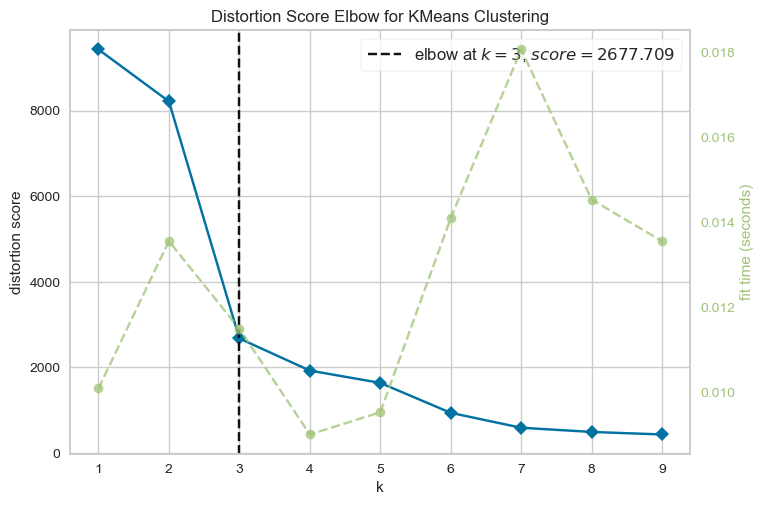

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_encoded)
visualizer.show()

In [121]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_encoded)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_encoded, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8100063723196866


## **c. Visualisasi Hasil Clustering**

In [122]:
customer_data['label'] = labels
customer_data.head()

,CustomerID,Quantity_scaled,TotalPrice_scaled,Country,label
0,12346.0,14.452940,8.363977,UK,1
1,12347.0,0.250849,0.251779,Non-UK,2
2,12348.0,0.227692,-0.027938,Non-UK,2
3,12349.0,-0.110750,-0.032357,Non-UK,2
4,12350.0,-0.196647,-0.190780,Non-UK,2


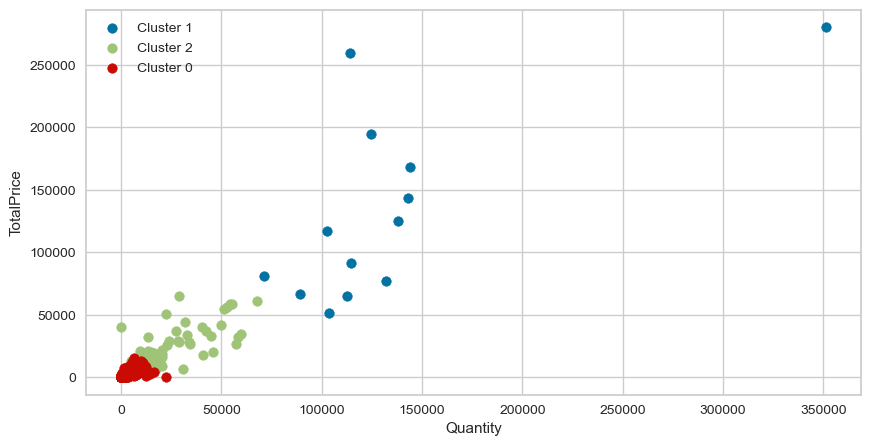

In [123]:
plt.figure(figsize=(10, 5))
for cluster in customer_data['label'].unique():
    cluster_data = customer_data[customer_data['label'] == cluster]
    plt.scatter(
        scaller.inverse_transform(cluster_data[['Quantity_scaled']]),
        scaller.inverse_transform(cluster_data[['TotalPrice_scaled']]),
        label=f'Cluster {cluster}'
    )
plt.legend()
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.show()


In [125]:
from collections import Counter
print(Counter(customer_data['label']))

Counter({0: 3855, 2: 471, 1: 13})


## **d. Analisis**

In [128]:
cluster_counts = customer_data['label'].value_counts()
print("Jumlah data di setiap cluster:")
print(cluster_counts)

# Gunakan agregasi dengan mean, min, max, std untuk setiap cluster
cluster_summary = customer_data.groupby('label').agg({
    'Quantity_scaled': ['mean', 'min', 'max'],
    'TotalPrice_scaled': ['mean', 'min', 'max']
})

# Tampilkan hasil
print("\nRangkuman cluster dengan fungsi agregasi:")
cluster_summary


Jumlah data di setiap cluster:
label
0    3855
2     471
1      13
Name: count, dtype: int64

Rangkuman cluster dengan fungsi agregasi:


Quantity_scaled                      TotalPrice_scaled            \
                 mean       min        max              mean       min   
label                                                                    
0           -0.088768 -0.235439   2.246270         -0.090098 -0.228005   
1           14.673696  7.702508  38.851632         14.507854  5.507950   
2            0.321533 -0.234845   7.314388          0.337001 -0.222265   

                  
             max  
label             
0       1.509724  
1      30.964178  
2       7.026058

In [129]:
customer_data.groupby('label')['Country'].value_counts()

label  Country
0      UK         3855
1      UK            9
       Non-UK        4
2      Non-UK      414
       UK           57
Name: count, dtype: int64

## e. Interpretasi Hasil Cluster

**Label 0**

Karakteristik Cluster:
- **Quantity_scaled:**
  - Rata-rata: -0.088768
  - Rentang: -0.235439 hingga 2.246270
- **TotalPrice_scaled:**
  - Rata-rata: -0.090098
  - Rentang: -0.228005 hingga 1.509724
- **Distribusi Negara:**
  - Semua pelanggan berasal dari **UK** (3855 pelanggan)

- **Interpretasi:**
  - Nilai rata-rata **Quantity_scaled** dan **TotalPrice_scaled** rendah, menunjukkan bahwa klaster ini berisi pelanggan dengan jumlah pembelian dan total harga transaksi yang kecil atau mendekati nol.
  - Klaster ini mungkin mencakup pelanggan reguler atau dengan tingkat belanja rendah, terutama dari UK.


**Label 1**

Karakteristik Cluster:
- **Quantity_scaled:**
  - Rata-rata: 14.673696
  - Rentang: 7.702508 hingga 38.851632
- **TotalPrice_scaled:**
  - Rata-rata: 14.507854
  - Rentang: 5.507950 hingga 30.964178
- **Distribusi Negara:**
  - Pelanggan berasal dari **UK** (9 pelanggan) dan **Non-UK** (4 Pelanggan)

- **Interpretasi:**
  - Nilai rata-rata **Quantity_scaled** dan **TotalPrice_scaled** sangat tinggi, menunjukkan bahwa klaster ini berisi pelanggan dengan jumlah pembelian besar dan nilai transaksi tinggi.
  - Klaster ini mungkin mencakup pelanggan korporat, reseller, atau pelanggan dengan pembelian dalam jumlah besar.

**Label 2**

Karakteristik Cluster:
- **Quantity_scaled:**
  - Rata-rata: 0.321533
  - Rentang: -0.234845 hingga 7.314388
- **TotalPrice_scaled:**
  - Rata-rata: 0.337001
  - Rentang: -0.222265 hingga 7.026058
- **Distribusi Negara:**
  - Pelanggan dari **UK**: 57 pelanggan
  - Pelanggan dari **Non-UK**: 414 pelanggan

- **Interpretasi:**
  - Nilai rata-rata **Quantity_scaled** dan **TotalPrice_scaled** lebih tinggi dibandingkan Label 0 tetapi jauh lebih rendah dibandingkan Label 1, menunjukkan bahwa klaster ini berisi pelanggan dengan jumlah pembelian sedang dan nilai transaksi moderat.
  - Mayoritas pelanggan moderat (pertengahan) berasal dari luar UK, menunjukkan bahwa klaster ini mungkin mewakili pelanggan internasional atau ekspor.


## f. Rekomendasi

**Label 0 (Cluster 0)**

Kelompok ini memiliki tingkat belanja yang rendah. Beberapa rekomendasi strategi pemasaran yang dapat dilakukan: 
1. Promosi diskon & penawaran spesial.
2. Program loyalitas dasar (poin transaksi kecil).
3. Email marketing dengan penawaran personal.
4. Upselling & cross-selling produk terkait.


**Label 1 (Cluster 1)**

Kelompok ini memiliki tingkat pembelian yang tinggi (high buyers). Beberapa rekomendasi strategi pemasaran yang dapat dilakukan:
1. Fokus pada retensi pelanggan dengan memberikan layanan eksklusif atau diskon volume untuk mempertahankan hubungan baik.
2. Kerjasama dengan bisnis (harga grosir) jika ternyata pelanggan merupakan reseller.

**Label 2 (Cluster 2)**

Kelompok ini merupakan kelompok pelanggan moderat (pertengahan). Beberapa rekomendasi strategi pemasaran yang dapat dilakukan:
1. Promosi musiman atau kampanye khusus.
2. Peningkatan engagement via media sosial.
3. Penawaran bundling produk atau insentif nilai transaksi.
4. Kampanye internasional untuk menarik pelanggan luar negeri (Non-UK).

# **7. Mengeksport Data**

In [130]:
customer_data.to_csv('D:\Dika\MSIB\Dicoding\Machine Learning\hasil_clustering.csv', index=False)
print("Data berhasil diekspor ke CSV!")


Data berhasil diekspor ke CSV!
